# Numpy Basic Concepts

In [1]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

In [2]:
from addutils import css_notebook
css_notebook()

## 1 What is Numpy ?

NumPy is the fundamental package for scientific computing with Python. It is:

* a powerful Python extension for N-dimensional array
* a tool for integrating C/C++ and Fortran code
* designed for scientific computation: linear algebra and Signal Analysis

If you are a MATLAB&reg; user we recommend to read [Numpy for MATLAB Users](http://www.scipy.org/NumPy_for_Matlab_Users) and [Benefit of Open Source Python versus commercial packages](http://www.scipy.org/NumPyProConPage). For an idea of the Open Source Approach to science, we suggest the [Science Code Manifesto](http://sciencecodemanifesto.org/)

### 1.1 Documentation and reference:

* [Numpy Reference guide](http://docs.scipy.org/doc/numpy/reference/)
* [SciPy Reference](http://docs.scipy.org/doc/scipy/reference/)
* [Scipy Topical Software](http://www.scipy.org/Topical_Software)
* [Numpy Functions by Category](http://www.scipy.org/Numpy_Functions_by_Category)
* [Numpy Example List With Doc](http://www.scipy.org/Numpy_Example_List_With_Doc)  

Lets start by checking the Numpy version used in this Notebook:

In [3]:
import numpy as np
print 'numpy version: ', np.__version__

numpy version:  1.9.2


## 2 Array Creation

NumPy's main object is the homogeneous ***multidimensional array***. It is a table of elements (usually numbers), all of the same type. In Numpy dimensions are called ***axes***. The number of axes is called ***rank***. The most important attributes of an ndarray object are:

* **ndarray.ndim**     - the number of axes (dimensions) of the array. 
* **ndarray.shape**    - the dimensions of the array. For a matrix with n rows and m columns, shape will be (n,m). 
* **ndarray.size**     - the total number of elements of the array. 
* **ndarray.dtype**    - numpy.int32, numpy.int16, and numpy.float64 are some examples. 
* **ndarray.itemsize** - the size in bytes of elements of the array. For example, elements of type float64 has itemsize 8 (=64/8) 

In [4]:
a = np.array([[0,1,2,3], [4,5,6,7], [8,9,10,11]])
rows, cols = np.shape(a)
print 'Rows:{0:03d} ; Cols:{0:03d}'.format(rows, cols)

Rows:003 ; Cols:003


**Try by yourself**   the following commands *(type or paste the commands in the cell below)*:

    a.ndim                  # Number of dimensions
    print a.dtype.name      # Type of data
    a.itemsize              # Size in bytes of elements
    a.size                  # Number of elements in the array

In [5]:
a.ndim

2

The type of the array can be specified at creation time:

In [6]:
b = np.array([[2,3], [6,7]], dtype=np.complex64)
print b

[[ 2.+0.j  3.+0.j]
 [ 6.+0.j  7.+0.j]]


### 2.1 Array creation functions

Often, the elements of an array are originally unknown, but its size is known. Hence, **NumPy** offers several functions to create arrays with initial placeholder content.

The function `zeros` creates an array full of zeros, the function `ones` creates an array full of ones, and the function `empty` creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array is float64.  
***Try by yourself*** the following commands:

    zeros((3,4))
    ones((3,4))
    empty((2,3))
    eye(3)
    diag(np.arange(5))
    np.tile(np.array([[6, 7], [8, 9]]), (2, 2))

In [7]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

`zeros_like, ones_like` and `empty_like` can be used to create arrays of the same type of a given one

In [8]:
np.zeros_like(b)

array([[ 0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j]], dtype=complex64)

### 2.2 Sequences and reshaping

Arrays can be created with ***linspace***, ***logspace*** (returning evenly spaced numbers, linear or logarithmic) or ***arange*** and then shaped in matrix form. **mgrid** is like the equivaled "meshgrid" in MATLAB.

In [9]:
np.logspace(1,5,3)

array([  1.00000000e+01,   1.00000000e+03,   1.00000000e+05])

In [10]:
x = np.arange(4).reshape(2,2)

In [11]:
# Use List comprehention to create a matrix
c = np.array([[10*j+i for i in range(3)] for j in range(4)])
print c

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


Use *'newaxis'* to add a dimension (as for turning a row vector in a column vector):

In [12]:
d = np.linspace(0, 12, 5)
print d
print d[:, np.newaxis]       # make into a column vector

[  0.   3.   6.   9.  12.]
[[  0.]
 [  3.]
 [  6.]
 [  9.]
 [ 12.]]


In [13]:
X, Y = np.mgrid[0:5, 0:5] # similar to meshgrid in MATLAB
X

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [14]:
Y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

### 2.3 Sparse Matrices

We can create and manipulate sparse matrices as follows:

In [15]:
from scipy import sparse
X = np.random.random((5, 6)) # Create an array with many zeros
X[X < 0.85] = 0
print X
X_csr = sparse.csr_matrix(X) # turn X into a csr (Compressed-Sparse-Row) matrix
print X_csr

[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.92444007  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.94028206]
 [ 0.          0.          0.85876528  0.          0.85595287  0.        ]
 [ 0.          0.          0.          0.          0.          0.85209378]]
  (1, 3)	0.924440066768
  (2, 5)	0.940282064165
  (3, 2)	0.858765277876
  (3, 4)	0.855952868569
  (4, 5)	0.852093783911


In [16]:
print X_csr.toarray()       # convert back to a dense array

[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.92444007  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.94028206]
 [ 0.          0.          0.85876528  0.          0.85595287  0.        ]
 [ 0.          0.          0.          0.          0.          0.85209378]]


There are several other sparse formats that can be useful for various problems:

- `CSC` (compressed sparse column)
- `BSR` (block sparse row)
- `COO` (coordinate)
- `DIA` (diagonal)
- `DOK` (dictionary of keys)

The ``scipy.sparse`` submodule also has a lot of functions for sparse matrices
including linear algebra, sparse solvers, graph algorithms, and much more.

### 2.4 Random Numbers

In [17]:
np.random.rand(4,5) # uniform random numbers in [0,1]

array([[ 0.75208579,  0.7440176 ,  0.51976402,  0.03908238,  0.34116018],
       [ 0.77884651,  0.10409579,  0.68244803,  0.79114846,  0.8114769 ],
       [ 0.68280494,  0.91447238,  0.56306315,  0.05911395,  0.1116756 ],
       [ 0.42959426,  0.59139839,  0.28866111,  0.31195804,  0.32818945]])

In [18]:
np.random.randn(4,5) # standard normal distributed random numbers

array([[-1.20989609, -0.22449782, -1.55094024, -1.26523275, -1.33008763],
       [ 0.38889411,  0.95470971, -0.15162816,  0.43101972,  1.44171011],
       [ 0.07120801,  1.06303698, -0.07703831,  0.27041357, -1.42054876],
       [-1.17014631,  0.71463536, -0.85750893, -0.14067902,  0.08173225]])

### 2.5 Casting

Forced casts:

In [19]:
a = np.array([1.7, 1.2, 1.6])
b = a.astype(int)           # <-- truncates to integer
b

array([1, 1, 1])

Rounding:

In [20]:
a = np.array([1.2, 1.5, 1.6, 2.5, 3.5, 4.5])
b = np.around(a)
print b                     # still floating-point
c = np.around(a).astype(int)
print c

[ 1.  2.  2.  2.  4.  4.]
[1 2 2 2 4 4]


## 3 Basic Visualization with Bokeh


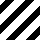
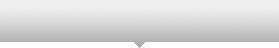
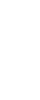
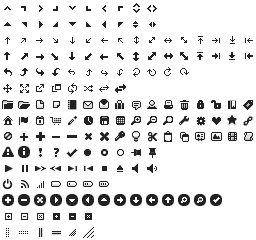
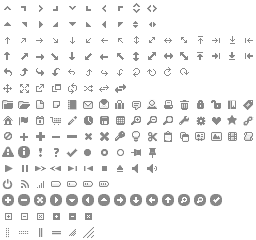
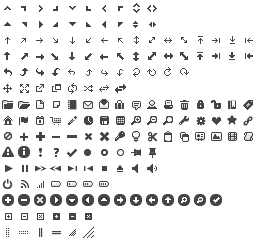
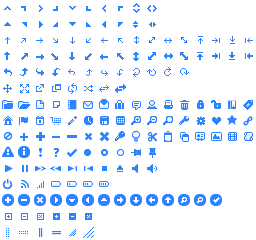
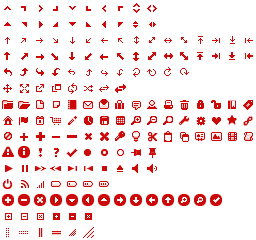
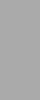
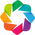
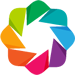
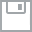
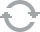
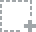
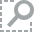
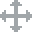
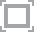
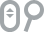

In [21]:
import bokeh.plotting as bk
bk.output_notebook()

### 3.1 D Plotting

In [22]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
fig = bk.figure()
fig.line(x, y)
fig.circle(x, y, color='green')
bk.show(fig)

Somethimes, if the code is not relevant for the topic we are developing, we can put the code in a separate file and run it from the Notebook:

In [23]:
from utilities import plot_01
bk.show(plot_01())

At any time if you want to see the code, you can load it and run it directly from the cell in the Notebook:

In [24]:
# %load utilities/plot_utilities.py
import numpy as np
import bokeh.plotting as bk
bk.output_notebook()
    
def plot_01():
    image = np.random.randn(120, 120)
    fig = bk.figure()
    fig.image([image], x=[0], y=[0], dw=[1], dh=[1], palette='OrRd9')
    return fig

if __name__ == '__main__':
    fig = plot_01()
    bk.show(fig)


## 4 Basic Linear Algebra

In [25]:
# Transpose
print x.T

[ 0.          0.15789474  0.31578947  0.47368421  0.63157895  0.78947368
  0.94736842  1.10526316  1.26315789  1.42105263  1.57894737  1.73684211
  1.89473684  2.05263158  2.21052632  2.36842105  2.52631579  2.68421053
  2.84210526  3.        ]


Explore the available commands for numpy arrays (press x.+TAB) ***Try by yourself:*** 
    
    x.min()
    x.max()
    x.mean()
    x.cumsum()

In [26]:
x.min()

0.0

In [27]:
print x*5         # Scalar expansion
print x+3

[  0.           0.78947368   1.57894737   2.36842105   3.15789474
   3.94736842   4.73684211   5.52631579   6.31578947   7.10526316
   7.89473684   8.68421053   9.47368421  10.26315789  11.05263158
  11.84210526  12.63157895  13.42105263  14.21052632  15.        ]
[ 3.          3.15789474  3.31578947  3.47368421  3.63157895  3.78947368
  3.94736842  4.10526316  4.26315789  4.42105263  4.57894737  4.73684211
  4.89473684  5.05263158  5.21052632  5.36842105  5.52631579  5.68421053
  5.84210526  6.        ]


In [28]:
print x*x.T       # Elementwise product
print np.dot(x,x.T)  # Dot (matrix) product

[ 0.          0.02493075  0.09972299  0.22437673  0.39889197  0.6232687
  0.89750693  1.22160665  1.59556787  2.01939058  2.49307479  3.0166205
  3.5900277   4.2132964   4.88642659  5.60941828  6.38227147  7.20498615
  8.07756233  9.        ]
61.5789473684


### 4.1 Determinant of a square matrix

The `scipy.linalg.det()` function computes the determinant of a square matrix:

In [29]:
from scipy import linalg
arr = np.array([[1, 2],
               [3, 4]])
linalg.det(arr)

-2.0

### 4.2 Inverse of a square matrix

The `scipy.linalg.inv()` function computes the inverse of a square matrix:

In [30]:
print linalg.inv(arr)

[[-2.   1. ]
 [ 1.5 -0.5]]


### 4.3 Advanced Linear Algebra

In **Scipy** many advanced operations are available (check the Scipy Reference), for example singular-value decomposition (SVD):

In [31]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

The resulting array spectrum is:

In [32]:
spec

array([ 14.88982544,   0.45294236,   0.29654967])

## 5 Slicing -Indexing for MATLAB<sup>&reg;</sup> Users-

For MATLAB<sup>&reg;</sup> users: in Python, like many other languages, indexing start from **zero** and not from one like MATLAB.

Remember: slices (indexed subarrays) are references to memory in the original array, this means that if you modify a slice, you modify the original array. In other words a slice is a pointer to the original array.

In [33]:
b = np.arange(8).reshape(2,4)
print b

[[0 1 2 3]
 [4 5 6 7]]


### 5.1 Indexing single elements

***Try by yourself:***

    print b[0,0]
    print b[-1,-1]   # Last element
    print b[:,1]     # column number 1 (second column)

In [34]:
# Indexing single elements


<img src="files/utilities/numpy_array.jpg" > *Figure 01*

### 5.2 Indexing by rows and columns

In [35]:
# With reference to Figure 01:
a = np.array([[10*j+i for i in range(6)] for j in range(6)])

***Try by yourself:***

    print a[0,3:5]     # Orange
    print a[4:,4:]     # Blue
    print a[:, 2]      # Red
    print a[2::2, ::2] # Green

In [36]:
#Indexing multiple elements


To replicate an array use 'copy':

In [37]:
c = np.array(a, copy=True)

## 6 File Input / Output

Numpy has special functions for:

* Load/Save text files: `numpy.loadtxt()`/`numpy.savetxt()`
* Clever loading of text/csv files: `numpy.genfromtxt()`/`numpy.recfromcsv()`
* Fast and efficient, but numpy-specific, binary format: `numpy.save()`/`numpy.load()`

In particular Numpy can load and save native MATLAB<sup>&reg;</sup> files:

In [38]:
from scipy import io as spio
spio.savemat('test.mat', {'c': c}, oned_as='row') # savemat expects a dictionary
data = spio.loadmat('test.mat')
data['c']

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

---

Visit [www.add-for.com](<http://www.add-for.com/IT>) for more tutorials and updates.

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.